# **Import the required libraries**

In [78]:
import torch 
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# **Inherting from native class module**

**Creating the ANN layout**

In [79]:
class Model(nn.Module):
  def __init__(self,in_features=4,h1=8,h2=9,out_features=3):
    #how many layers ?
    super().__init__ ()# Instanciates the model we are inheriting from
    self.fc1 = nn.Linear(in_features,h1) #fc refers to fully connected layers
    self.fc2 = nn.Linear(h1,h2)
    self.out = nn.Linear(h2,out_features)
    # i/p layer(4 features) --> hidden layer 1 --> hidden layer 2 --> output(3 classes for this cases)
  def forward(self,x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)
    return x

**Create an instance of the model**

In [80]:
torch.manual_seed(32)
model = Model()

# **Importing the dataset**

In [81]:
df = pd.read_csv('iris.csv')

In [82]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [83]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0
149,5.9,3.0,5.1,1.8,2.0


# **Splitting into train and test set**

In [84]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [85]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=33)

In [86]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train =  torch.LongTensor(y_train)
y_test =  torch.LongTensor(y_test)

In [87]:
criterion = nn.CrossEntropyLoss() #Multiclass classification Problem
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)

# **Training the model**

In [88]:
epochs = 100
losses = []
for i in range(epochs):
  y_pred = model.forward(X_train)
  loss = criterion(y_pred,y_train)
  losses.append(loss)
  if i%10 ==0:
    print(f'epoch {i} and loss-->{loss}')
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

epoch 0 and loss-->1.1507114171981812
epoch 10 and loss-->0.9377315044403076
epoch 20 and loss-->0.7798256278038025
epoch 30 and loss-->0.6099401712417603
epoch 40 and loss-->0.40079936385154724
epoch 50 and loss-->0.25436320900917053
epoch 60 and loss-->0.15053054690361023
epoch 70 and loss-->0.10086946934461594
epoch 80 and loss-->0.08128312230110168
epoch 90 and loss-->0.07231426239013672


Text(0, 0.5, 'Loss')

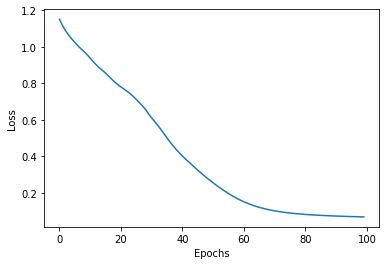

In [89]:
plt.plot(range(epochs),losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')

# **Validating the created model**

In [92]:
with torch.no_grad():
  y_eval = model.forward(X_test)
  loss = criterion(y_eval,y_test)

In [103]:
loss

tensor(0.0581)

In [115]:
correct = 0
with torch.no_grad():
  for i,data in enumerate(X_test):
    y_val = model.forward(data)
    print(f'{i+1} -->{str(y_val.argmax().item())} ---> {y_test[i]}')
    if y_val.argmax().item() == y_test[i]:
      correct += 1

1 -->1 ---> 1
2 -->1 ---> 1
3 -->0 ---> 0
4 -->1 ---> 1
5 -->2 ---> 2
6 -->2 ---> 2
7 -->0 ---> 0
8 -->0 ---> 0
9 -->2 ---> 2
10 -->2 ---> 2
11 -->2 ---> 2
12 -->0 ---> 0
13 -->2 ---> 2
14 -->1 ---> 1
15 -->2 ---> 2
16 -->1 ---> 1
17 -->2 ---> 2
18 -->0 ---> 0
19 -->1 ---> 1
20 -->2 ---> 2
21 -->0 ---> 0
22 -->0 ---> 0
23 -->2 ---> 2
24 -->0 ---> 0
25 -->2 ---> 2
26 -->2 ---> 2
27 -->1 ---> 1
28 -->1 ---> 1
29 -->2 ---> 2
30 -->2 ---> 2


In [118]:
print(f'{correct } Predictions !!')

30 Predictions !!


# **Saving the trained model**

In [119]:
torch.save(model.state_dict(),'my_iris_model.pt') # model needs to be passed directly if the Model class is to be saved as well

# **Importing from the saved model file**

In [120]:
new_model = Model()
new_model.load_state_dict(torch.load('my_iris_model.pt'))

<All keys matched successfully>

In [121]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

# **Classifying new data**

In [123]:
mystery_iris = torch.tensor([5.6,3.7,2.2,0.5]) # New Data point

In [129]:
with torch.no_grad():
  print(f'It belongs to Class {new_model(mystery_iris).argmax().item()}')

It belongs to Class 0
